In [1]:
import joblib
import warnings
import os

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

In [3]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [4]:
import os
# Get the current working directory
current_directory = os.getcwd()
# Print the current working directory
print("Current directory:", current_directory)


Current directory: C:\Users\hp\Desktop\diabetes


In [5]:
rs = 73
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [6]:
styled_df = df.head(5).style
# Set background color, text color, and border for the entire DataFrame
styled_df.set_properties(**{"background-color": "#254E58", "color": "#e9c46a"})
# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
 {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.000000,1.000000,0.000000,1.000000,26.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,5.000000,30.000000,0.000000,1.000000,4.000000,6.000000,8.000000
1,0.000000,1.000000,1.000000,1.000000,26.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,12.000000,6.000000,8.000000
2,0.000000,0.000000,0.000000,1.000000,26.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,10.000000,0.000000,1.000000,13.000000,6.000000,8.000000
3,0.000000,1.000000,1.000000,1.000000,28.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,3.000000,0.000000,1.000000,11.000000,6.000000,8.000000
4,0.000000,0.000000,0.000000,1.000000,29.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,8.000000


In [7]:
rows , col = df.shape
print(f"Number of Rows : {rows} \nNumber of Columns : {col}")

Number of Rows : 70692 
Number of Columns : 22


In [8]:
# Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [9]:
## counting NAN values
df.isnull().sum()


Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [10]:
## all float types are coverted into integer
df = df.astype(int)

In [11]:
# define a function to simplify the plots in further sections
def ida_plot(li_col, row, col=3, figsize=(8,8)):
 
 """
 This function return plt subplots by 
 looping through the df columns
 display only the desired columns
 """
 
 # prepare subplot format
 fig, ax = plt.subplots(row, col, figsize=figsize)
 axe = ax.ravel()
 # use for loop to plot
 for i in range(len(li_col)):
 # create bar charts for each column
  sns.countplot(x=df[li_col[i]], ax=axe[i])
 # adjust the spacing of the subplots
  plt.subplots_adjust(
   wspace=0.5,
   hspace=0.5
 )


In [12]:
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
70687    False
70688    False
70689    False
70690    False
70691    False
Length: 70692, dtype: bool

In [13]:
## checking for category levels in each variable
# Initialize an empty dictionary to store unique category levels for each variable
unique_levels_dict = {}
# Iterate through each column in the DataFrame
for column in df.columns:
 # Get unique category levels for the column
 unique_levels = df[column].unique()
 # Store the unique category levels in the dictionary
 unique_levels_dict[column] = unique_levels
# Print the dictionary containing unique category levels for each variable
for variable, levels in unique_levels_dict.items():
 print(f"Variable: {variable}")
 print("Unique category levels:", levels)
 print()


Variable: Diabetes_binary
Unique category levels: [0 1]

Variable: HighBP
Unique category levels: [1 0]

Variable: HighChol
Unique category levels: [0 1]

Variable: CholCheck
Unique category levels: [1 0]

Variable: BMI
Unique category levels: [26 28 29 18 31 32 27 24 21 58 30 20 22 38 40 25 36 47 19 37 41 23 34 35
 42 17 33 44 15 52 69 56 45 39 92 53 98 50 46 79 48 16 63 72 54 49 68 43
 84 73 76 55 51 75 57 60 12 77 82 67 71 61 14 81 59 86 13 87 65 95 89 62
 64 66 85 70 83 80 78 74]

Variable: Smoker
Unique category levels: [0 1]

Variable: Stroke
Unique category levels: [0 1]

Variable: HeartDiseaseorAttack
Unique category levels: [0 1]

Variable: PhysActivity
Unique category levels: [1 0]

Variable: Fruits
Unique category levels: [0 1]

Variable: Veggies
Unique category levels: [1 0]

Variable: HvyAlcoholConsump
Unique category levels: [0 1]

Variable: AnyHealthcare
Unique category levels: [1 0]

Variable: NoDocbcCost
Unique category levels: [0 1]

Variable: GenHlth
Unique category 

<Axes: xlabel='Diabetes_binary', ylabel='count'>

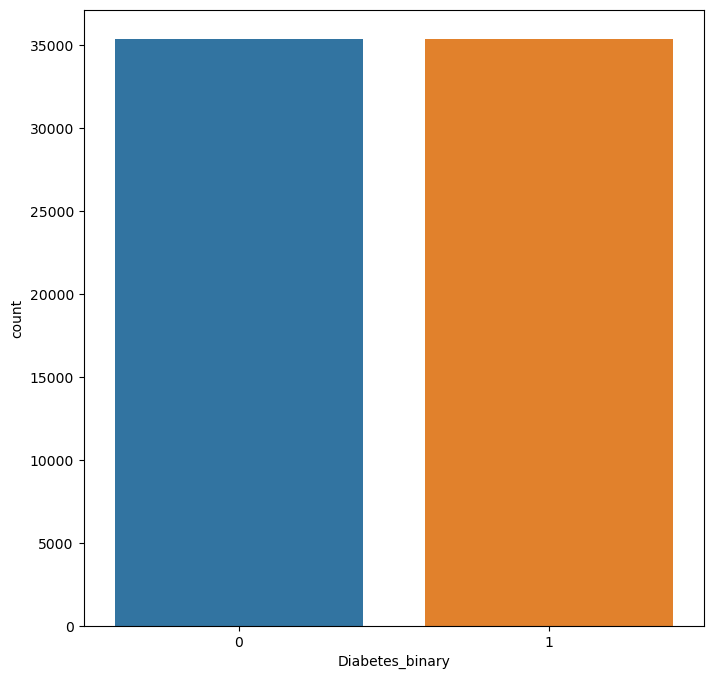

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.countplot(data=df, x='Diabetes_binary')


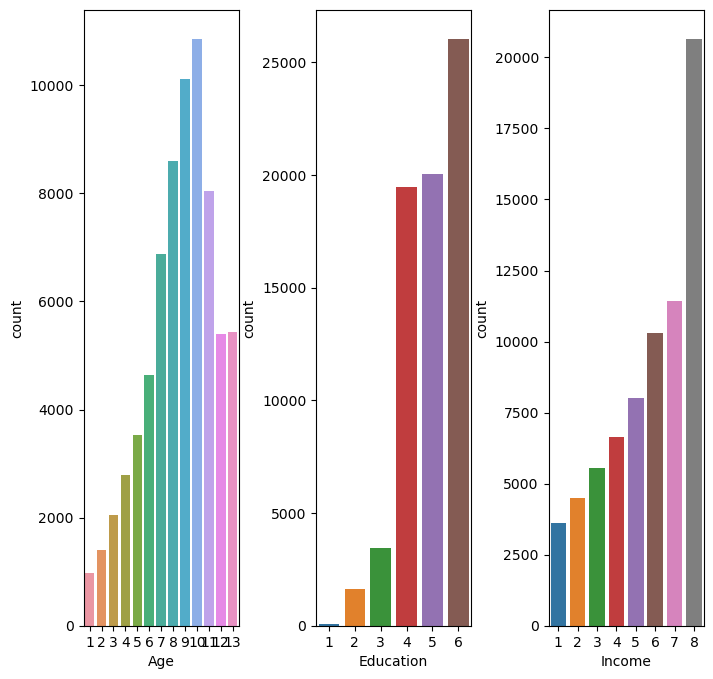

In [15]:
ida_plot(['Age', 'Education', 'Income'], 1, 3)


In [16]:
## recarogarizing
## age variable
# Create a mapping dictionary to map original categories to new categories
category_mapping = {
 1: 1,
 2: 1,
 3: 2,
 4: 2,
 5: 2,
 6: 2,
 7: 3,
 8: 3,
 9: 3,
 10: 3,
 11: 4,
 12: 4,
 13: 4
 
}
# Use map function to apply the mapping to the age column
df['Age'] = df['Age'].map(category_mapping)
# Check the result
print(df['Age'].value_counts())



Age
3    36443
4    18864
2    13010
1     2375
Name: count, dtype: int64


In [17]:
## cheching if recategorization is right
unique_levels = df['Age'].unique()
# Print the unique category levels
print("Unique category levels:", unique_levels)


Unique category levels: [2 4 3 1]


In [18]:
## recarogarizing
## Education variable
# Create a mapping dictionary to map original categories to new categories
category_mapping2 = {
 1: 1,
 2: 2,
 3: 2,
 4: 2,
 5: 3,
 6: 4
 
}
# Use map function to apply the mapping to the age column
df['Education'] = df['Education'].map(category_mapping2)
# Check the result
print(df['Education'].value_counts())


Education
4    26020
2    24567
3    20030
1       75
Name: count, dtype: int64


In [19]:
## cheching if recategorization is right
unique_levels2 = df['Education'].unique()
# Print the unique category levels
print("Unique category levels:", unique_levels2)


Unique category levels: [4 3 2 1]


In [20]:
## recarogarizing
## Income variable
# Create a mapping dictionary to map original categories to new categories
category_mapping3 = {
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 2,
 6: 2,
 7: 3,
 8: 4
 
}
# Use map function to apply the mapping to the age column
df['Income'] = df['Income'].map(category_mapping3)
# Check the result
print(df['Income'].value_counts())

Income
4    20646
1    20324
2    18297
3    11425
Name: count, dtype: int64


In [21]:
## cheching if recategorization is right
unique_levels3 = df['Income'].unique()
# Print the unique category levels
print("Unique category levels:", unique_levels3)


Unique category levels: [4 3 2 1]


In [22]:
#split the data set
from sklearn.model_selection import train_test_split
x=df.drop(columns='Diabetes_binary')
y=df['Diabetes_binary']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y,random_state=42)
x_train.describe()
y_train.describe()
x_test.describe()
y_test.describe()




count    14139.000000
mean         0.499965
std          0.500018
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Diabetes_binary, dtype: float64

In [27]:
###Ridge regression
ridge = RidgeClassifier(alpha=1.0)
ridge.fit(x_train, y_train)
# Predict on the test set
y_pred = ridge.predict(x_test)
### Predict on the training set
y_pred_tr = ridge.predict(x_train)
from sklearn.metrics import accuracy_score
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy test:", accuracy_test)
accuracy_train = accuracy_score(y_train, y_pred_tr)
print("Accuracy train:", accuracy_train)

from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)








Accuracy test: 0.7456680104675012
Accuracy train: 0.7467862005552314
Confusion Matrix:
[[5081 1989]
 [1607 5462]]


In [39]:
######random forest
from sklearn.metrics import accuracy_score
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(x_train,y_train)
# Evaluating the model
y_pred = rf_classifier.predict(x_test)
y_pred_tr = rf_classifier.predict(x_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy test:", accuracy_test)
accuracy_train = accuracy_score(y_train, y_pred_tr)
print("Accuracy train:", accuracy_train)

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)




Accuracy test: 0.7263597142655067
Accuracy train: 0.9853765494315068
Confusion Matrix:
[[4879 2191]
 [1678 5391]]


In [40]:
######random forest parameter tuning

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [3,4,5],
    'min_samples_leaf': [1, 2, 4]
}

# Creating Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(x_test)
y_pred2 = best_rf_classifier.predict(x_train)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy test:", accuracy)
accuracy2 = accuracy_score(y_train, y_pred2)
print("Accuracy train:", accuracy2)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)




Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
Accuracy test: 0.7475068958200721
Accuracy train: 0.7707460258518558
Confusion Matrix:
[[4958 2112]
 [1458 5611]]


In [41]:
# Get the number of variables (features)
num_variables = best_rf_classifier.n_features_in_

print("Number of variables in the Random Forest:", num_variables)

Number of variables in the Random Forest: 21


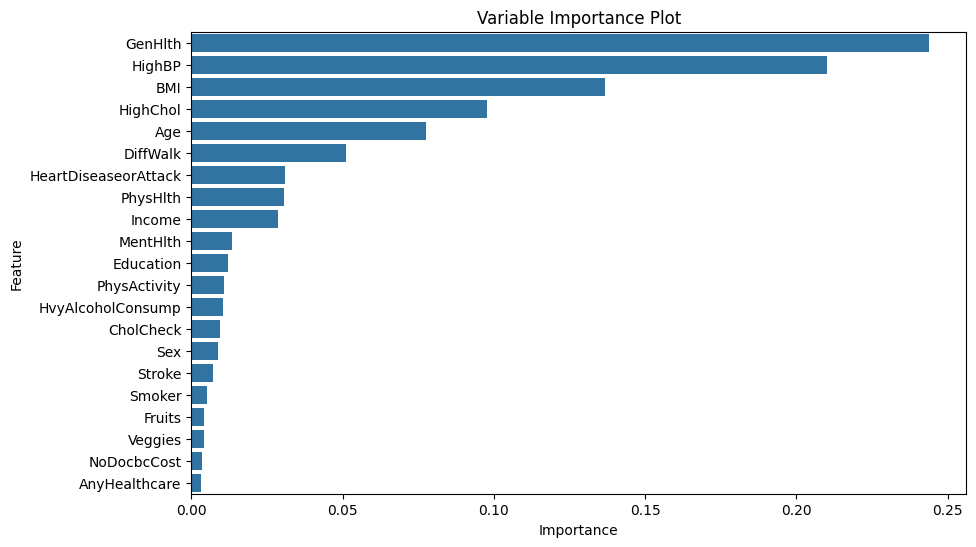

In [42]:
# Getting feature importances
importances = best_rf_classifier.feature_importances_

# Creating a DataFrame with feature importances
feature_importances_df = pd.DataFrame({'feature': x_train.columns, 'importance': importances})

# Sorting the DataFrame by feature importance
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Plotting the variable importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances_df)
plt.title('Variable Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
## clustering using k prototype
!pip install kmodes



In [23]:
from kmodes import kprototypes

In [24]:
print(x_train.columns)

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [25]:
x_train['BMI']=x_train['BMI'].astype(float)

In [26]:
#obtain array of values
data_array=x_train.values
print(data_array)

[[1. 0. 1. ... 3. 4. 4.]
 [0. 1. 1. ... 3. 3. 1.]
 [1. 0. 1. ... 4. 3. 1.]
 ...
 [0. 0. 1. ... 2. 4. 3.]
 [0. 1. 1. ... 4. 3. 1.]
 [1. 0. 1. ... 3. 4. 2.]]


In [27]:
data_array[:, 0:2] = data_array[:, 0:2].astype(str)
data_array[:, 4:13] = data_array[:, 4:13].astype(str)
data_array[:, 16:20] = data_array[:, 16:20].astype(str)
data_array[:, 14:15] = data_array[:, 14:15].astype(float)




In [28]:
print(data_array)

[[1. 0. 1. ... 3. 4. 4.]
 [0. 1. 1. ... 3. 3. 1.]
 [1. 0. 1. ... 4. 3. 1.]
 ...
 [0. 0. 1. ... 2. 4. 3.]
 [0. 1. 1. ... 4. 3. 1.]
 [1. 0. 1. ... 3. 4. 2.]]


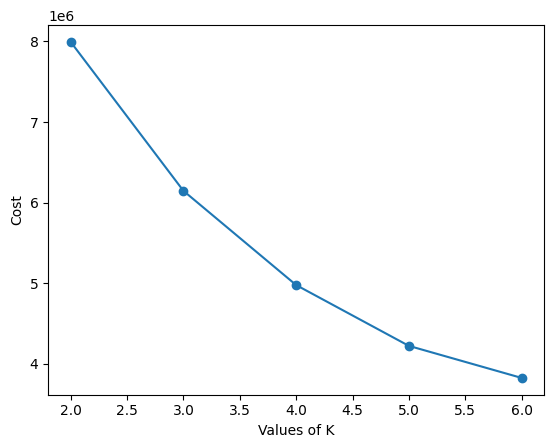

In [30]:
elbow_scores = dict()
range_of_k = range(2,7) 
for k in range_of_k :
    untrained_model = kprototypes.KPrototypes(n_clusters=k,random_state=100)
    trained_model = untrained_model.fit(data_array, categorical=[0, 1, 2,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20])
    elbow_scores[k]=trained_model.cost_
 
plt.plot(elbow_scores.keys(),elbow_scores.values())
plt.scatter(elbow_scores.keys(),elbow_scores.values())
plt.xlabel("Values of K") 
plt.ylabel("Cost") 
plt.show()

In [41]:
# cost (sum distance): confirm visual clue of elbow plot
# KneeLocator class will detect elbows if curve is convex; if concave, will detect knees
!pip install kneed
from kneed import KneeLocator
cost_knee_c3 = KneeLocator(
        x=list(elbow_scores.keys()),
        y=list(elbow_scores.values()), 
        S=0.1, curve="convex", direction="decreasing", online=True)

K_cost_c3 = cost_knee_c3.elbow   
print("elbow at k =", f'{K_cost_c3:.0f} clusters')

elbow at k = 4 clusters


In [36]:
print(elbow_scores)

{2: 7994276.152192633, 3: 6147085.188818441, 4: 4978093.52062171, 5: 4223646.253334878, 6: 3826142.49057408}


In [44]:
####silhoutte plot
from sklearn.metrics import silhouette_samples, silhouette_score
# Perform K-Prototypes clustering with k=4
num_clusters = 4
kproto = kprototypes.KPrototypes(n_clusters=num_clusters, random_state=100)
clusters = kproto.fit_predict(data_array, categorical=[0, 1, 2,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20])

# Compute silhouette scores
silhouette_avg = silhouette_score(data_array, clusters)

print("Silhouette Score for k=4 in K-Prototypes clustering:", silhouette_avg)


Silhouette Score for k=4 in K-Prototypes clustering: 0.38651917576400785


In [45]:
print(clusters)

[1 1 0 ... 0 0 1]


In [50]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [51]:
cluster_dict

[1,
 1,
 0,
 1,
 0,
 0,
 3,
 1,
 1,
 3,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 3,
 2,
 1,
 0,
 3,
 0,
 1,
 3,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 3,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 3,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 3,
 0,
 1,
 3,
 1,
 0,
 2,
 0,
 3,
 3,
 1,
 0,
 0,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 2,
 3,
 3,
 1,
 1,
 0,
 3,
 2,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 0,
 1,
 1,
 1,
 0,
 3,
 1,
 0,
 2,
 0,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 0,
 3,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 1,


In [53]:
# Assuming X_train and y_train are your training data and target variable, respecti
# Convert y_train to a DataFrame
y_train_df = pd.DataFrame(y_train)
# Concatenate X_train and y_train_df along the columns axis
df1 = pd.concat([x_train, y_train_df], axis=1)
# Display the resulting DataFrame
print(df1)

       HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
47977       1         0          1  29.0       1       0   
2676        0         1          1  24.0       1       0   
35637       1         0          1  42.0       1       0   
52420       1         1          1  30.0       0       0   
12445       1         0          1  35.0       1       0   
...       ...       ...        ...   ...     ...     ...   
58170       1         1          1  31.0       1       0   
17655       0         1          1  27.0       0       0   
37819       0         0          1  65.0       0       0   
41157       0         1          1  32.0       1       0   
25909       1         0          1  30.0       0       0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
47977                     0             1       1        1  ...            0   
2676                      0             1       0        1  ...            0   
35637                     0            

In [54]:
df1['cluster']=cluster_dict

In [55]:
df1

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary,cluster
47977,1,0,1,29.0,1,0,0,1,1,1,...,2,0,0,0,1,3,4,4,1,1
2676,0,1,1,24.0,1,0,0,1,0,1,...,3,15,6,0,0,3,3,1,0,1
35637,1,0,1,42.0,1,0,0,1,1,1,...,3,0,10,1,0,4,3,1,1,0
52420,1,1,1,30.0,0,0,1,1,1,1,...,3,0,1,0,0,3,3,2,1,1
12445,1,0,1,35.0,1,0,0,1,1,1,...,3,0,0,0,1,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58170,1,1,1,31.0,1,0,1,1,0,1,...,5,0,30,1,1,4,2,1,1,2
17655,0,1,1,27.0,0,0,0,0,1,1,...,3,0,0,0,1,4,4,4,0,1
37819,0,0,1,65.0,0,0,0,0,0,1,...,4,14,5,1,0,2,4,3,1,0
41157,0,1,1,32.0,1,0,0,1,1,1,...,3,5,0,0,0,4,3,1,1,0


In [46]:
pip install nbconvert


In [48]:
pip install -U notebook-as-pdf


     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     -------------------- ----------------- 30.7/57.6 kB 640.0 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/57.6 kB 518.5 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 503.7 kB/s eta 0:00:00
     ---------------------------------------- 0.0/48.9 kB ? eta -:--:--
     ---------------------------------------- 48.9/48.9 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/84.9 kB ? eta -:--:--
     ---------------------------- ----------- 61.4/84.9 kB 1.6 MB/s eta 0:00:01
     ---------------------------------------- 84.9/84.9 kB 1.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished 